In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from numpy import log

traindf= pd.read_csv("Datasets/no_nan_train.csv")
testdf= pd.read_csv("Datasets/obs_test.csv")

In [184]:
for series, df_series in traindf.groupby('series_id'):
    name_df = series
    exec(name_df + "= df_series")

In [195]:
SP500.head()

,Unnamed: 0,series_id,value
150660,2011-02-14,SP500,1332.32
150661,2011-02-15,SP500,1328.01
150662,2011-02-16,SP500,1336.32
150663,2011-02-17,SP500,1340.43
150664,2011-02-18,SP500,1343.01
...,...,...,...
153166,2017-12-25,SP500,2681.21
153167,2017-12-26,SP500,2680.50
153168,2017-12-27,SP500,2682.62
153169,2017-12-28,SP500,2687.54


In [186]:
SP500.to_csv("SP500.csv")

In [170]:
result = adfuller(SP500.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.380320
p-value: 0.980744


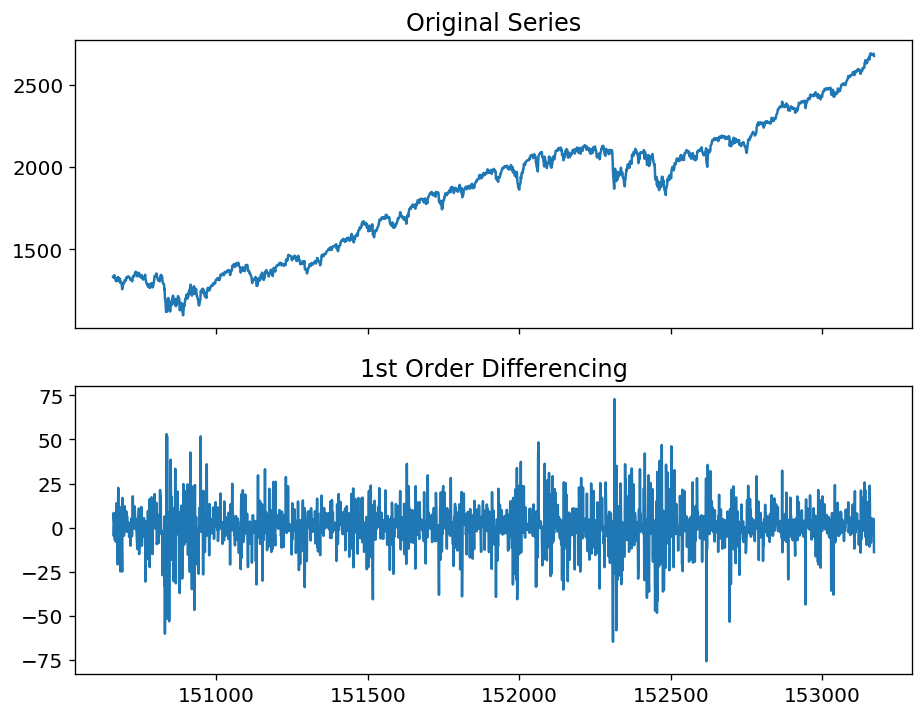

In [202]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(SP500.value); axes[0].set_title('Original Series')

# 1st Differencing
axes[1].plot(SP500.value.diff()); axes[1].set_title('1st Order Differencing')

plt.show()

Source: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [172]:
result = adfuller(SP500.value.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -21.070715
p-value: 0.000000


Check R code to see how I used auto.arima to find best ARIMA model (p=2,d=1,q=2)

C:\Users\erikj\Anaconda3new\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\erikj\Anaconda3new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 2510
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9665.223
Method:                       css-mle   S.D. of innovations             11.379
Date:                Sat, 10 Apr 2021   AIC                          19342.446
Time:                        20:50:11   BIC                          19377.414
Sample:                             1   HQIC                         19355.138
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5339      0.240      2.227      0.026       0.064       1.004
ar.L1.D.value     1.1007      0.134      8.225      0.000       0.838       1.363
ar.L2.D.value    -0.8030      0.080    -

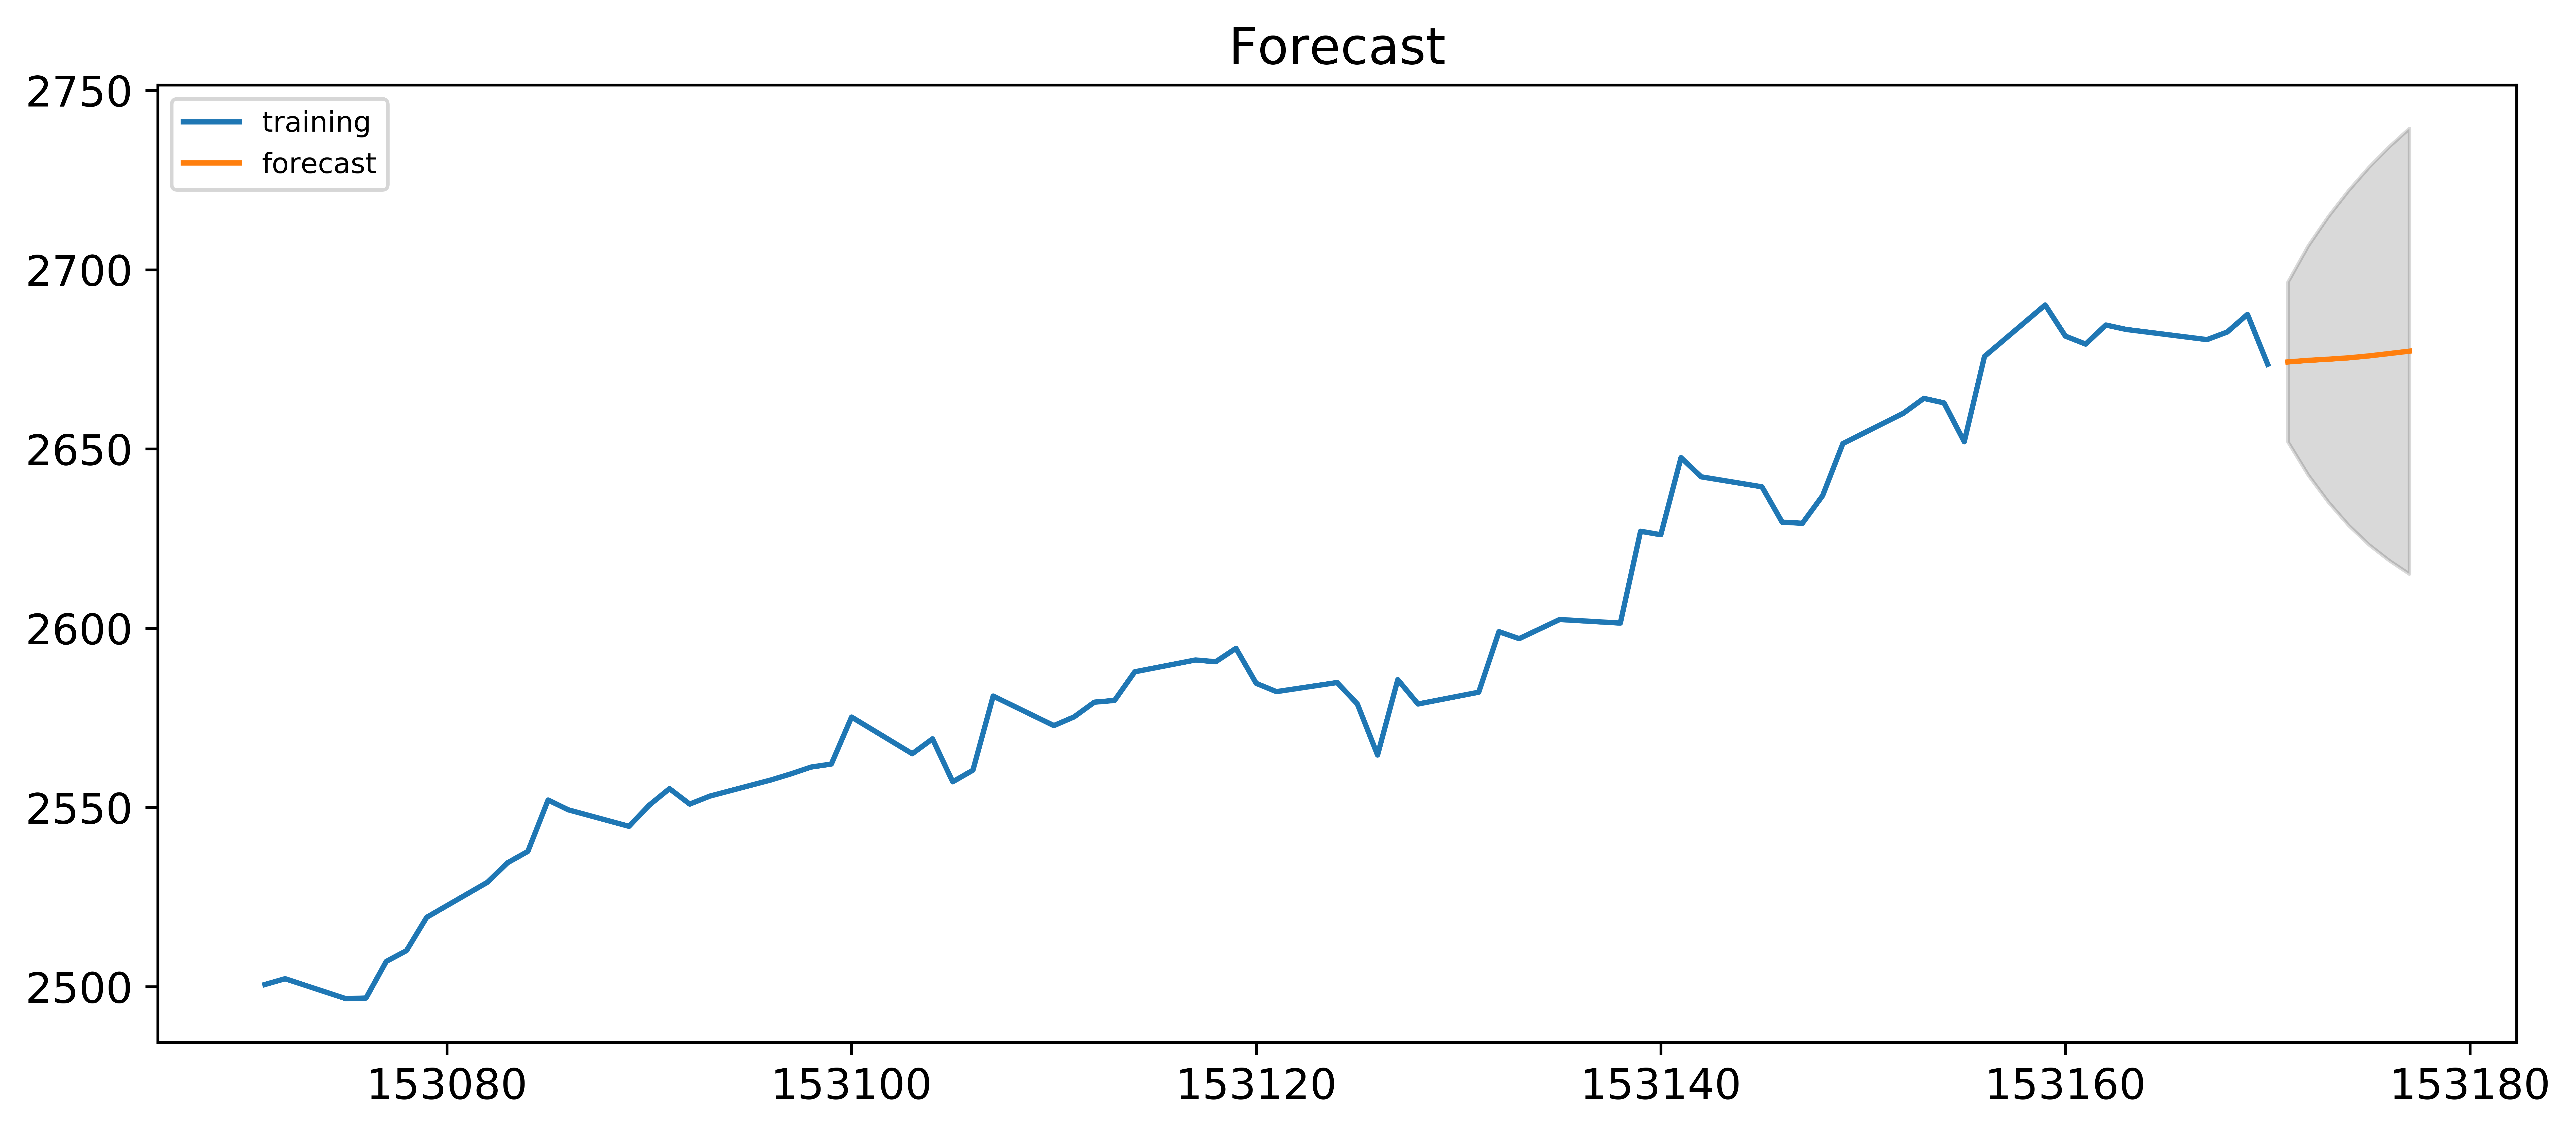

In [189]:
# Build Model
model = ARIMA(SP500.value[~np.isnan(SP500.value)], order=(2, 1 ,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(7, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc,index=list(range(max(SP500.index)+1,max(SP500.index)+8)))
lower_series = pd.Series(conf[:, 0], index=fc_series.index)
upper_series = pd.Series(conf[:, 1], index=fc_series.index)

# Plot
plt.figure(figsize=(12,5), dpi=1000)
plt.plot(SP500.value[~np.isnan(SP500.value)].tail(100), label='training')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [198]:
# Build Model
model = ARIMA(SP500.value[~np.isnan(SP500.value)], order=(2, 1 ,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(7, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc,index=list(range(max(SP500.index)+1,max(SP500.index)+8)))
lower_series = pd.Series(conf[:, 0], index=fc_series.index)
upper_series = pd.Series(conf[:, 1], index=fc_series.index)

# Plot
plt.figure(figsize=(12,5), dpi=1000)
plt.plot(SP500.value[~np.isnan(SP500.value)].tail(100), label='training')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)

plt.show()


C:\Users\erikj\Anaconda3new\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\erikj\Anaconda3new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 2510
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9665.223
Method:                       css-mle   S.D. of innovations             11.379
Date:                Sat, 10 Apr 2021   AIC                          19342.446
Time:                        21:07:14   BIC                          19377.414
Sample:                             1   HQIC                         19355.138
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5339      0.240      2.227      0.026       0.064       1.004
ar.L1.D.value     1.1007      0.134      8.225      0.000       0.838       1.363
ar.L2.D.value    -0.8030      0.080    -

ValueError: Length of passed values is 7, index implies 2511

In [190]:
fc_series

153171    2674.269199
153172    2674.705476
153173    2675.031341
153174    2675.414687
153175    2675.949959
153176    2676.606297
153177    2677.273888
dtype: float64

In [197]:
SP500["Unnamed: 0"]

150660    2011-02-14
150661    2011-02-15
150662    2011-02-16
150663    2011-02-17
150664    2011-02-18
             ...    
153166    2017-12-25
153167    2017-12-26
153168    2017-12-27
153169    2017-12-28
153170    2017-12-29
Name: Unnamed: 0, Length: 2511, dtype: object

C:\Users\erikj\Anaconda3new\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\erikj\Anaconda3new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 2510
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9665.223
Method:                       css-mle   S.D. of innovations             11.379
Date:                Sat, 10 Apr 2021   AIC                          19342.446
Time:                        16:53:00   BIC                          19377.414
Sample:                             1   HQIC                         19355.138
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5339      0.240      2.227      0.026       0.064       1.004
ar.L1.D.value     1.1007      0.134      8.225      0.000       0.838       1.363
ar.L2.D.value    -0.8030      0.080    -

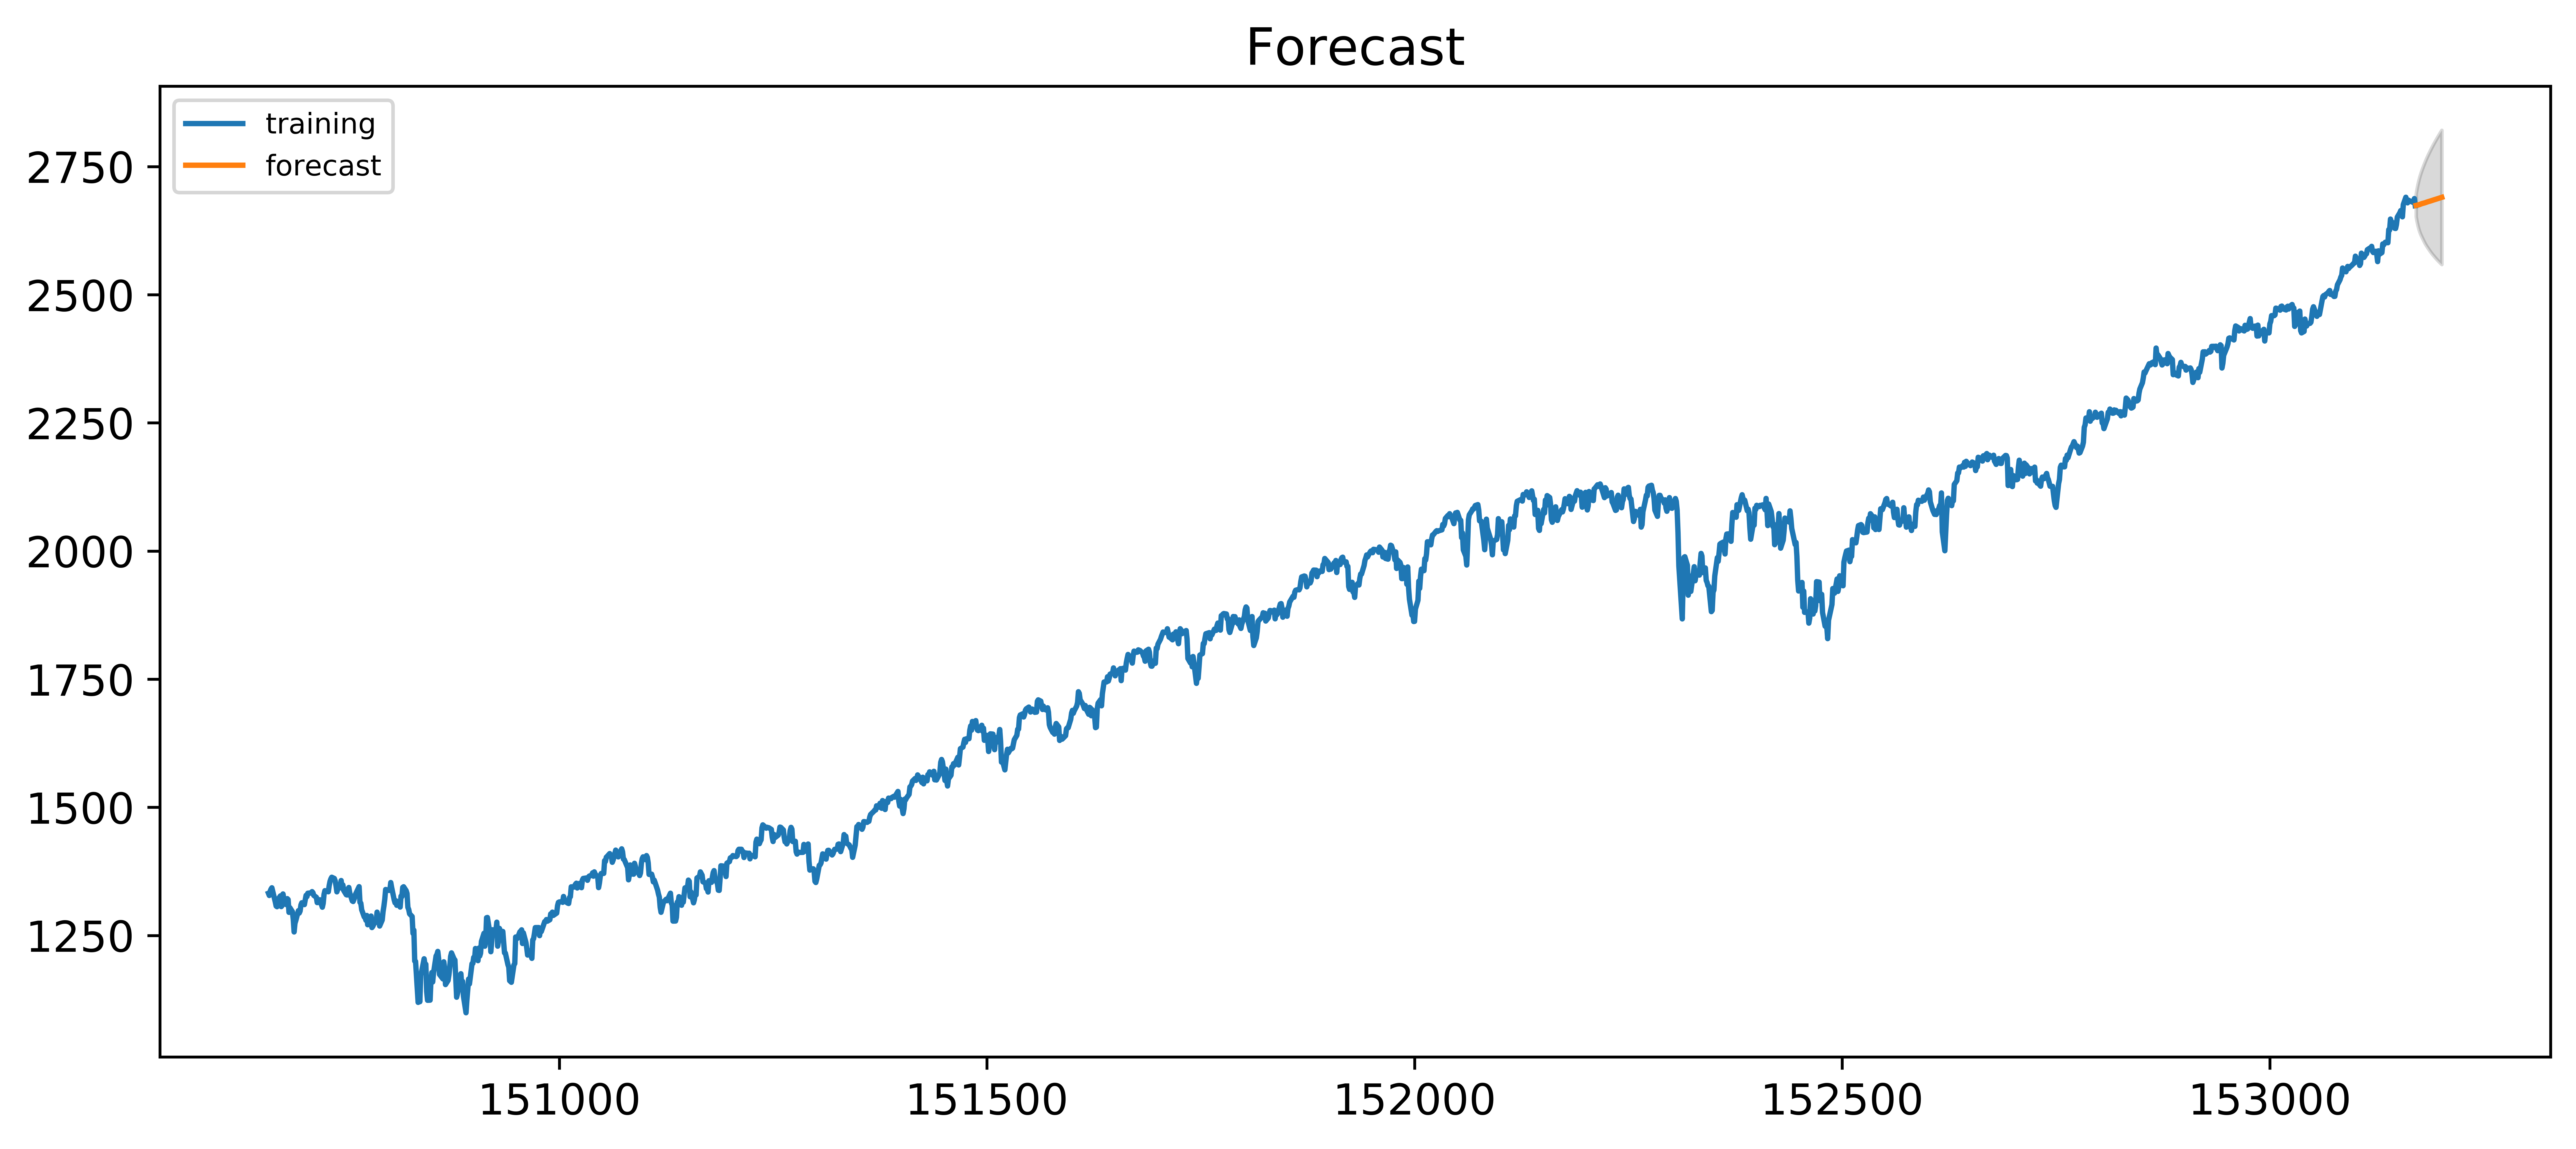

In [180]:
# Build Model
model = ARIMA(SP500.value[~np.isnan(SP500.value)], order=(2, 1 ,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(31, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc,index=list(range(max(SP500.index)+1,max(SP500.index)+32)))
lower_series = pd.Series(conf[:, 0], index=fc_series.index)
upper_series = pd.Series(conf[:, 1], index=fc_series.index)

# Plot
plt.figure(figsize=(12,5), dpi=1000)
plt.plot(SP500.value[~np.isnan(SP500.value)], label='training')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()


C:\Users\erikj\Anaconda3new\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\erikj\Anaconda3new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 2510
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9665.223
Method:                       css-mle   S.D. of innovations             11.379
Date:                Sat, 10 Apr 2021   AIC                          19342.446
Time:                        16:57:14   BIC                          19377.414
Sample:                             1   HQIC                         19355.138
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5339      0.240      2.227      0.026       0.064       1.004
ar.L1.D.value     1.1007      0.134      8.225      0.000       0.838       1.363
ar.L2.D.value    -0.8030      0.080    -

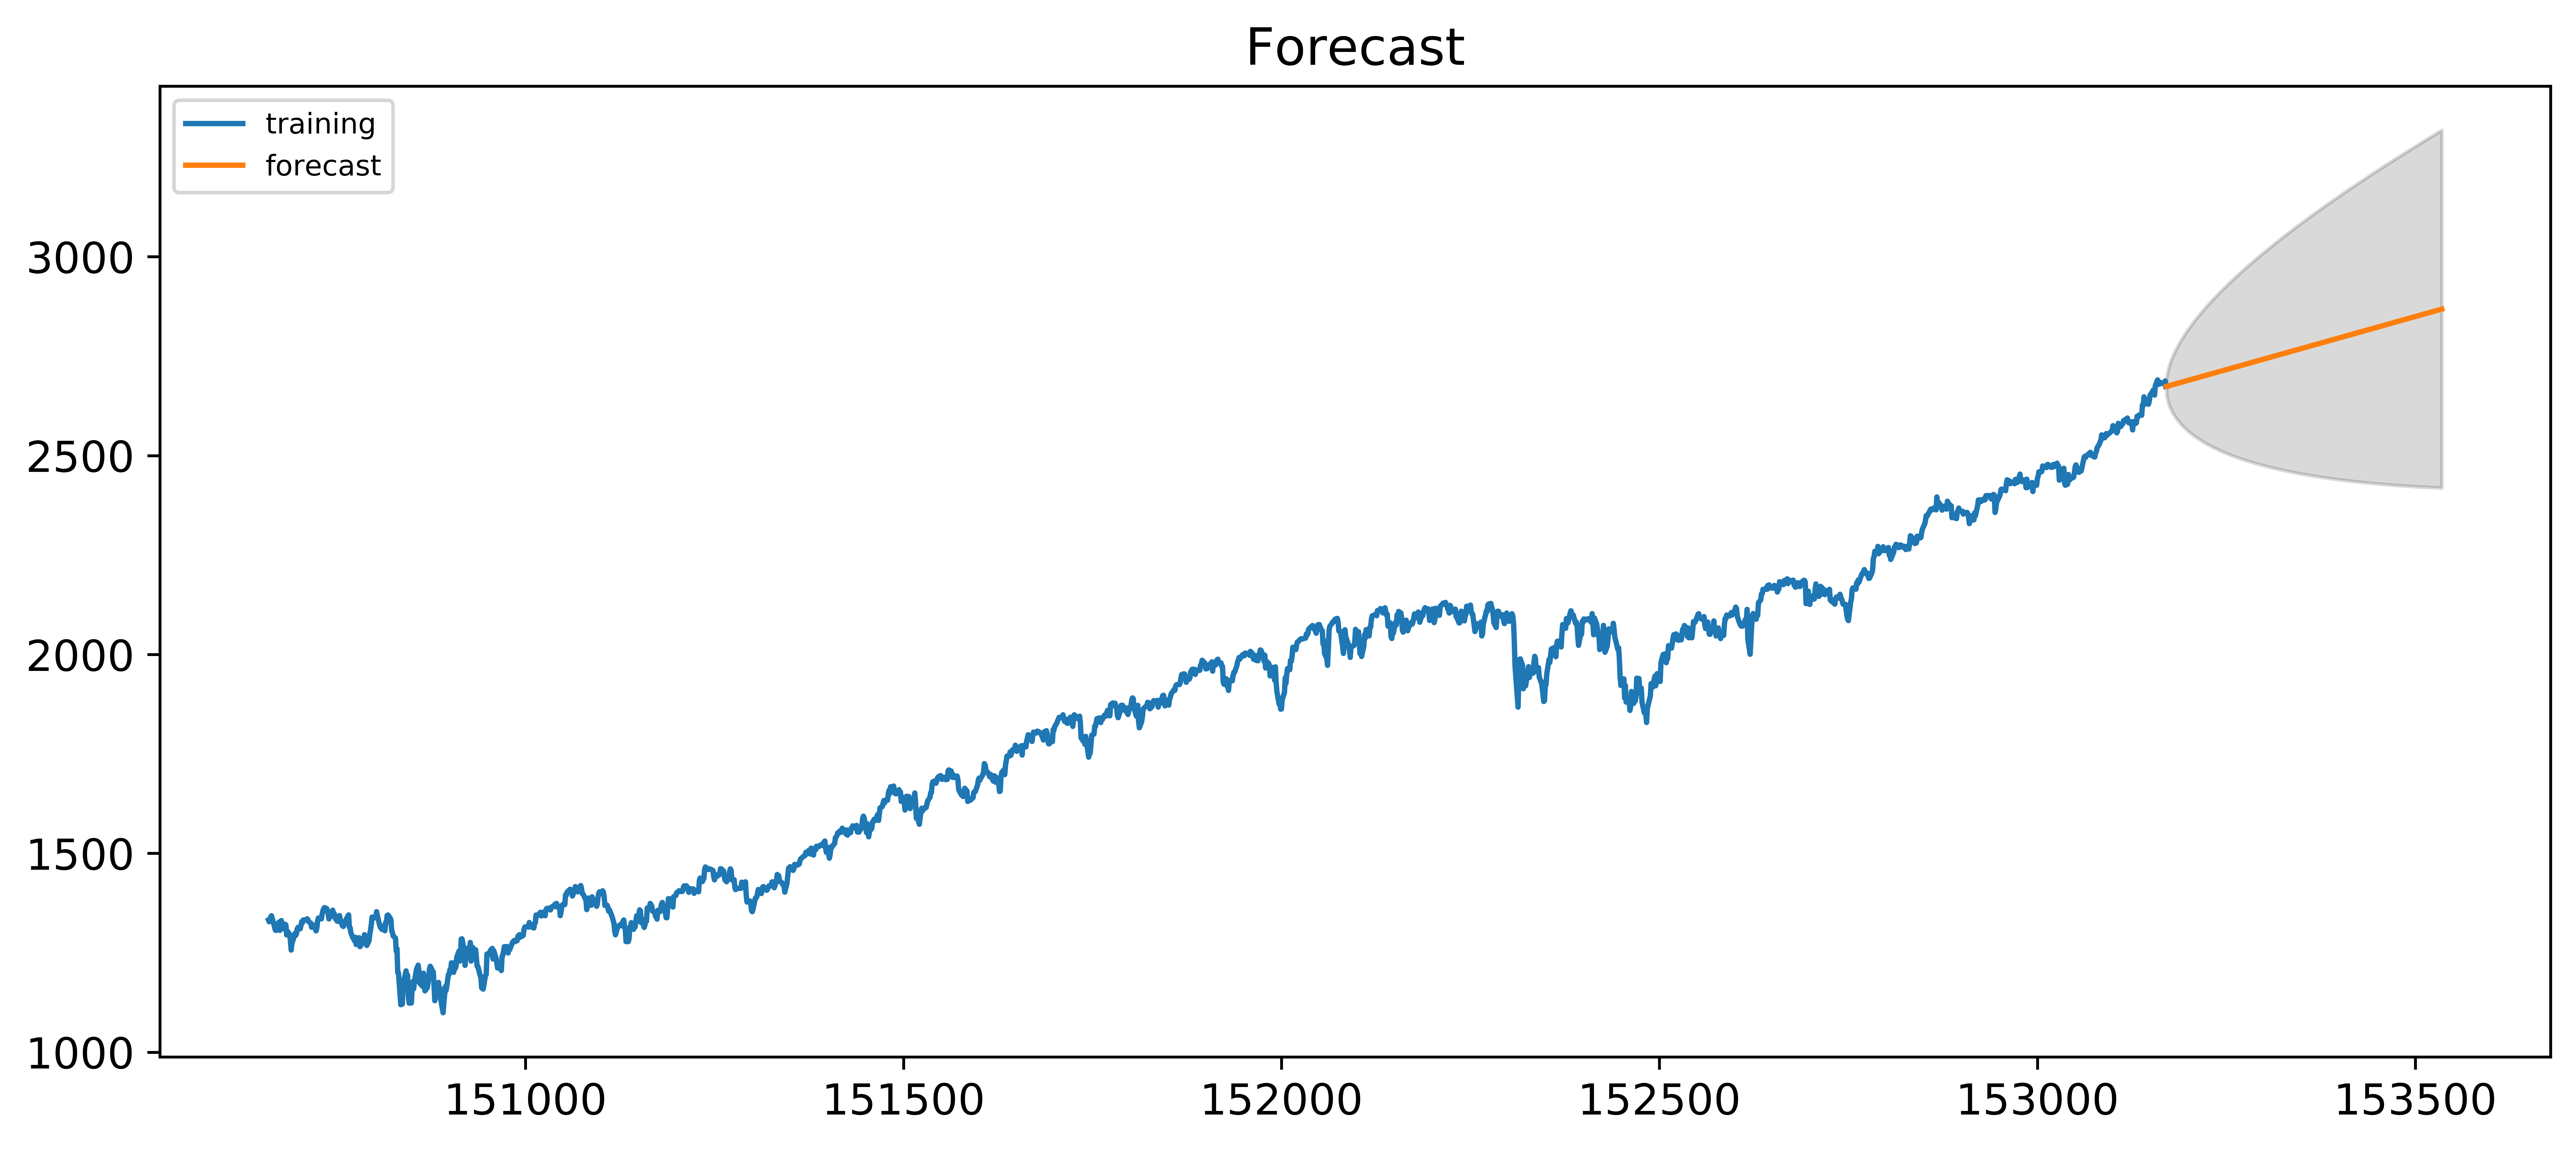

In [182]:
# Build Model
model = ARIMA(SP500.value[~np.isnan(SP500.value)], order=(2, 1 ,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(365, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc,index=list(range(max(SP500.index)+1,max(SP500.index)+366)))
lower_series = pd.Series(conf[:, 0], index=fc_series.index)
upper_series = pd.Series(conf[:, 1], index=fc_series.index)

# Plot
plt.figure(figsize=(12,5), dpi=1000)
plt.plot(SP500.value[~np.isnan(SP500.value)], label='training')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(SP500.date, SP500.value, color='blue')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('S&P 500');